In [1]:
from ligo.skymap.io.fits import read_sky_map
import ligo.skymap.plot
from matplotlib import pyplot as plt
import astropy.units as u
from astropy.coordinates import SkyCoord, Galactic
from matplotlib.patches import Circle
import pandas as pd
import numpy as np
import urllib.request

In [2]:
urllib.request.urlretrieve("https://gracedb.ligo.org/api/superevents/S240422ed/files/Bilby.offline0.multiorder.fits", "Bilby.offline0.multiorder.fits")
urllib.request.urlretrieve("http://ned.ipac.caltech.edu/NED::GWFevents/GWs/S240422ed/4/S240422ed_galaxies.csv", "S240422ed_galaxies.csv")

('S240422ed_galaxies.csv', <http.client.HTTPMessage at 0x1527ff510>)

In [3]:
# We will take as example S240422ed followup
map_lvk, meta_lvk = read_sky_map('Bilby.offline0.multiorder.fits')

In [4]:
galaxy_catalog = pd.read_csv('S240422ed_galaxies.csv')
galaxy_coordinates = []
relative_probability = []
for i in galaxy_catalog.index:
    galaxy_coordinates.append(SkyCoord(ra=galaxy_catalog.loc[i, 'ra']*u.deg,
                                       dec=galaxy_catalog.loc[i, 'dec']*u.deg))
    relative_probability.append(galaxy_catalog.loc[i, 'P_3D_LumW1']/galaxy_catalog['P_3D_LumW1'].max())

In [5]:
optical_candidate = [SkyCoord(ra='08h41m03.880s', dec='-18d35m35.27s'),
                     SkyCoord(ra='08h28m38.451s', dec='-20d22m59.58s'),
                     SkyCoord(ra= 121.61711*u.deg, dec= -25.02119*u.deg),
                     SkyCoord(ra= 126.60656*u.deg, dec= -24.03458*u.deg),
                     SkyCoord(ra= 126.19269*u.deg, dec= -33.12002*u.deg),
                     SkyCoord(ra= 122.320*u.deg, dec= -29.659*u.deg),]
name_optical_candidate = ['AT 2024hfr',
                          'AT 2024hfs',
                          'AT 2024hgl',
                          'AT 2024hiw',
                          'AT 2024hiu',
                          'GECKO24a']
X_ray_candidate = [SkyCoord(ra=120.3245*u.deg, dec=-28.1765*u.deg),
                   SkyCoord(ra=122.3954*u.deg, dec=-24.3272*u.deg)]
name_X_ray_candidate = ['S240422ed_X61',
                        'S240422ed_X101']

In [6]:
hotspot = SkyCoord(ra= '08h03min00s', dec= '-28d09m00s')
pointing_telescope = [SkyCoord(ra='08h25m08.857s', dec='-24d43m45.91s').directional_offset_by(275.7*u.deg, 0.4*u.deg),
                      X_ray_candidate[0].directional_offset_by(110*u.deg, 1.0*u.deg),
                      X_ray_candidate[1].directional_offset_by(180*u.deg, 0.7*u.deg)]

size_fov_telescope = 2.*u.deg

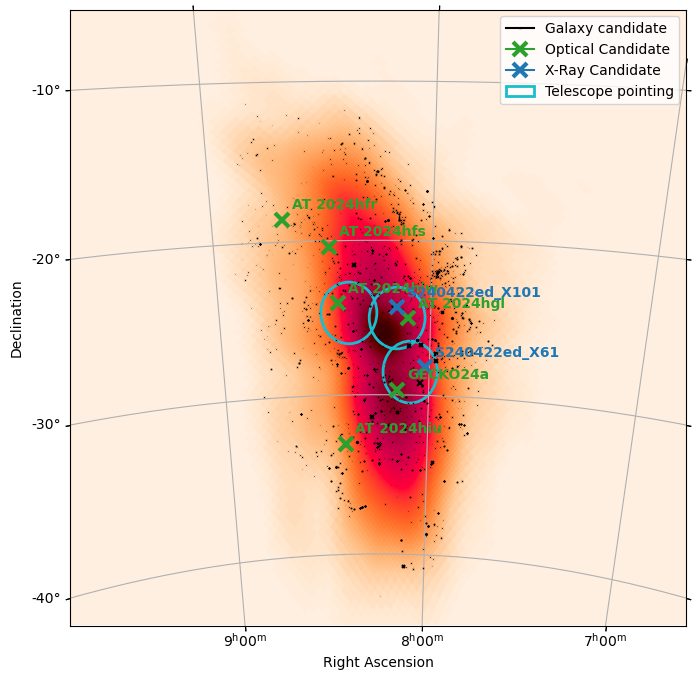

In [7]:
fig = plt.figure(figsize=(8, 8), dpi=100)

ax = plt.axes(
    projection='astro zoom',
    center='8h15 -25d',
    radius='20 deg',)
    
ax.grid()

ax.imshow_hpx(map_lvk, cmap='cylon')

for i in range(len(galaxy_coordinates)):
    ax.plot(
    galaxy_coordinates[i].ra.deg, galaxy_coordinates[i].dec.deg,
    transform=ax.get_transform('world'),
    marker='x',
    markersize=5*relative_probability[i],
    markeredgewidth=1.5,
    c='k',
    label = 'Galaxy candidate' if i == 0 else None)

for i in range(len(optical_candidate)):
    ax.plot(
    optical_candidate[i].ra.deg, optical_candidate[i].dec.deg,
    transform=ax.get_transform('world'),
    marker='x',
    markersize=10,
    markeredgewidth=3,
    c='tab:green',
    label = 'Optical Candidate' if i == 0 else None)
    ax.text(optical_candidate[i].ra.deg-0.7,
            optical_candidate[i].dec.deg+0.7,
            name_optical_candidate[i],
            transform=ax.get_transform('world'),
            c='tab:green',
            fontweight='bold')

for i in range(len(X_ray_candidate)):
    ax.plot(
    X_ray_candidate[i].ra.deg, X_ray_candidate[i].dec.deg,
    transform=ax.get_transform('world'),
    marker='x',
    markersize=10,
    markeredgewidth=3,
    c='tab:blue',
    label = 'X-Ray Candidate' if i == 0 else None)
    ax.text(X_ray_candidate[i].ra.deg-0.7,
            X_ray_candidate[i].dec.deg+0.7,
            name_X_ray_candidate[i],
            transform=ax.get_transform('world'),
            c='tab:blue',
            fontweight='bold')

for i in range(len(pointing_telescope)):
    c = Circle((pointing_telescope[i].ra.to_value(u.deg), pointing_telescope[i].dec.to_value(u.deg)),
               size_fov_telescope.to_value(u.deg),
               edgecolor='tab:cyan',
               facecolor='None',
               transform=ax.get_transform('world'),
               lw=2,
               alpha=1,
               label = 'Telescope pointing' if i == 0 else None)
    ax.add_patch(c)

plt.xlabel('Right Ascension')
plt.ylabel('Declination')
plt.legend()